
<div style="background-color: lightblue; padding: 60px;">
    <h1><b>Detect Anomalies Using Density Based Clustering</b></h1>
</div>


# Exercise

## Clustering - DBSCAN

Data points that are similar tend to belong to similar groups or clusters, as determined by their distance from local centroids. Normal data points occur around a dense neighborhood and abnormalities are far away.

Using density based clustering, like DBSCAN, we can design the model such that the data points that do not fall into a cluster are the anomalies.



In [20]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

import env

import itertools


# DBSCAN import
from sklearn.cluster import DBSCAN

# Scaler import
from sklearn.preprocessing import MinMaxScaler

# Acquire

In [6]:
from env import host, user, password

def get_connection_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [7]:
url = get_connection_url("grocery_db")

sql = """
select *
from grocery_customers
"""

df = pd.read_sql(sql, url, index_col="customer_id")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Construct a DBSCAN object that requires a minimum of 20 data points in a neighborhood of radius 0.1 to be considered a core point.

In [9]:
# basic data prep for scaling for this data set:
dimensions = ['Grocery', 'Frozen', 'Fresh']
df[dimensions]
# scale our data:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[dimensions])

In [10]:
scaled_data

array([[0.08146416, 0.0031063 , 0.11294004],
       [0.10309667, 0.02854842, 0.06289903],
       [0.08278992, 0.03911643, 0.05662161],
       ...,
       [0.32594285, 0.00677142, 0.1295431 ],
       [0.02402535, 0.01664914, 0.091727  ],
       [0.02702178, 0.00065742, 0.02482434]])

In [11]:
# do the standard make, fit use process with DBSCAN clustering:
# make our DBSCAN object:
dbs = DBSCAN(eps=0.1,min_samples=20)
# fit the object on our data:
dbs.fit(scaled_data)

DBSCAN(eps=0.1, min_samples=20)

In [ ]:
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [13]:
df['db_labels'] = dbs.labels_

In [14]:
# how many clusters did we get out of that?
df['db_labels'].nunique()

2

In [15]:
df['db_labels'].unique()

array([ 0, -1])

# Step 5: Extract labels


In [ ]:
NOTE: image.png

Note NOTE: Clusters will be identified as an index: [0,1,2,3,...]

Interesting article diving deeper into using DBSCAN to create clusters as well as identify anomalies.

Remember:
-1: refers to data that does not fall into a cluster
0: refers to data that does fall into the first cluster

In [16]:
dimensions


['Grocery', 'Frozen', 'Fresh']

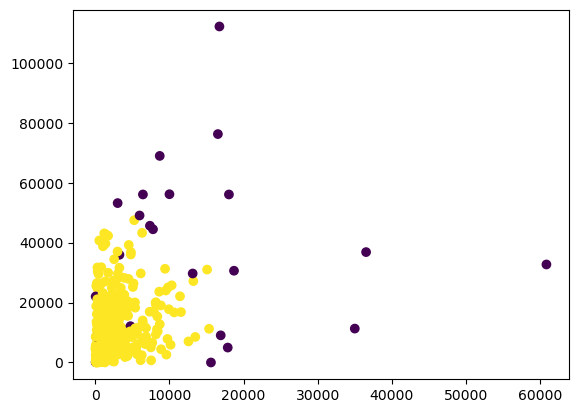

In [19]:
# at this point, I have only explored clusters
# with one set of hyperparams (epsilon and n neighbors)
# on three specific features
plt.scatter(df['Frozen'], df['Fresh'], c=df['db_labels'])
plt.show()


In [21]:
for combination in itertools.combinations(dimensions,2):
    print(combination)

('Grocery', 'Frozen')
('Grocery', 'Fresh')
('Frozen', 'Fresh')


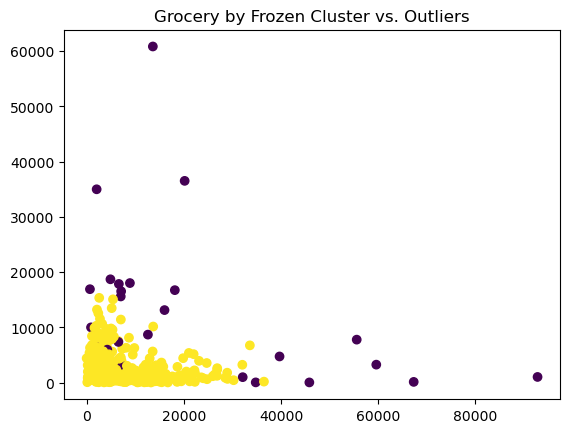

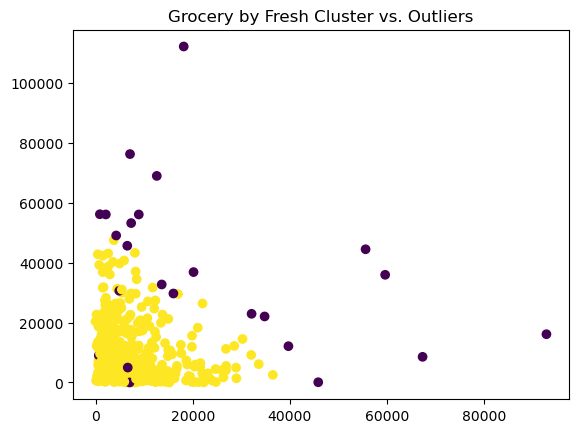

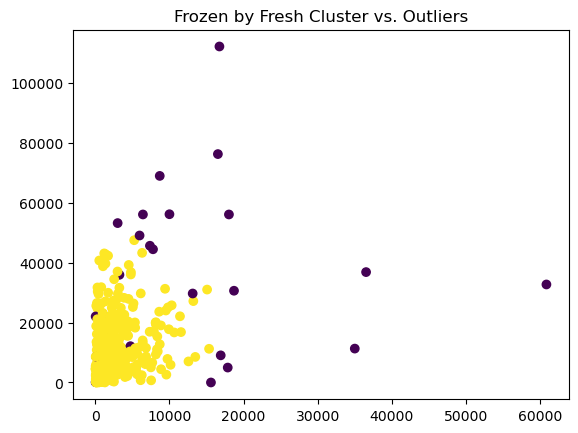

In [22]:
for combination in itertools.combinations(dimensions,2):
    plt.scatter(df[combination[0]], df[combination[1]], c=df.db_labels)
    plt.title(f"{combination[0]} by {combination[1]} Cluster vs. Outliers")
    plt.show()

In [23]:
dimensions

['Grocery', 'Frozen', 'Fresh']

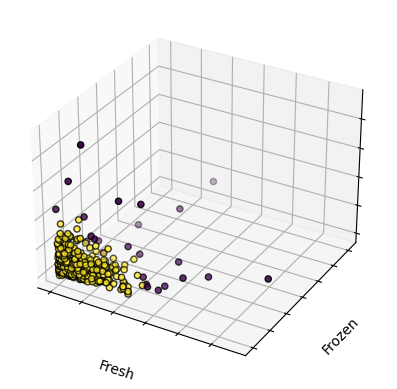

In [24]:
# Create a figure with a size of 8x8

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot the points using the Fresh, Milk, and Grocery columns from the DataFrame
# Color the points based on the gmf_labels column and add black edges
ax.scatter(df.Fresh, df.Frozen, df.Grocery, c=df.db_labels, edgecolor='k');

# Remove tick labels for the x-axis, y-axis, and z-axis
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

# Set labels for the x-axis, y-axis, and z-axis
ax.set_xlabel('Fresh')
ax.set_ylabel('Frozen')
ax.set_zlabel('Grocery')
# Display the plot
plt.show()